# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [2]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
dt = pd.read_csv('data.csv', sep=';')
dt.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
print(dt['Target'].unique())

['Dropout' 'Graduate' 'Enrolled']


In [4]:
# Removing Enrolled cause I won't be needing it
new_dt = dt[dt['Target'] != 'Enrolled'].reset_index(drop=True)
print(new_dt['Target'].unique())

['Dropout' 'Graduate']


In [5]:
# Changing categorical data to numerical data
new_dt['Target'] = new_dt['Target'].map({'Graduate': 0, 'Dropout': 1})
new_dt.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [6]:
new_dt["Target"].value_counts()

,count
Target,
0,2209
1,1421


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


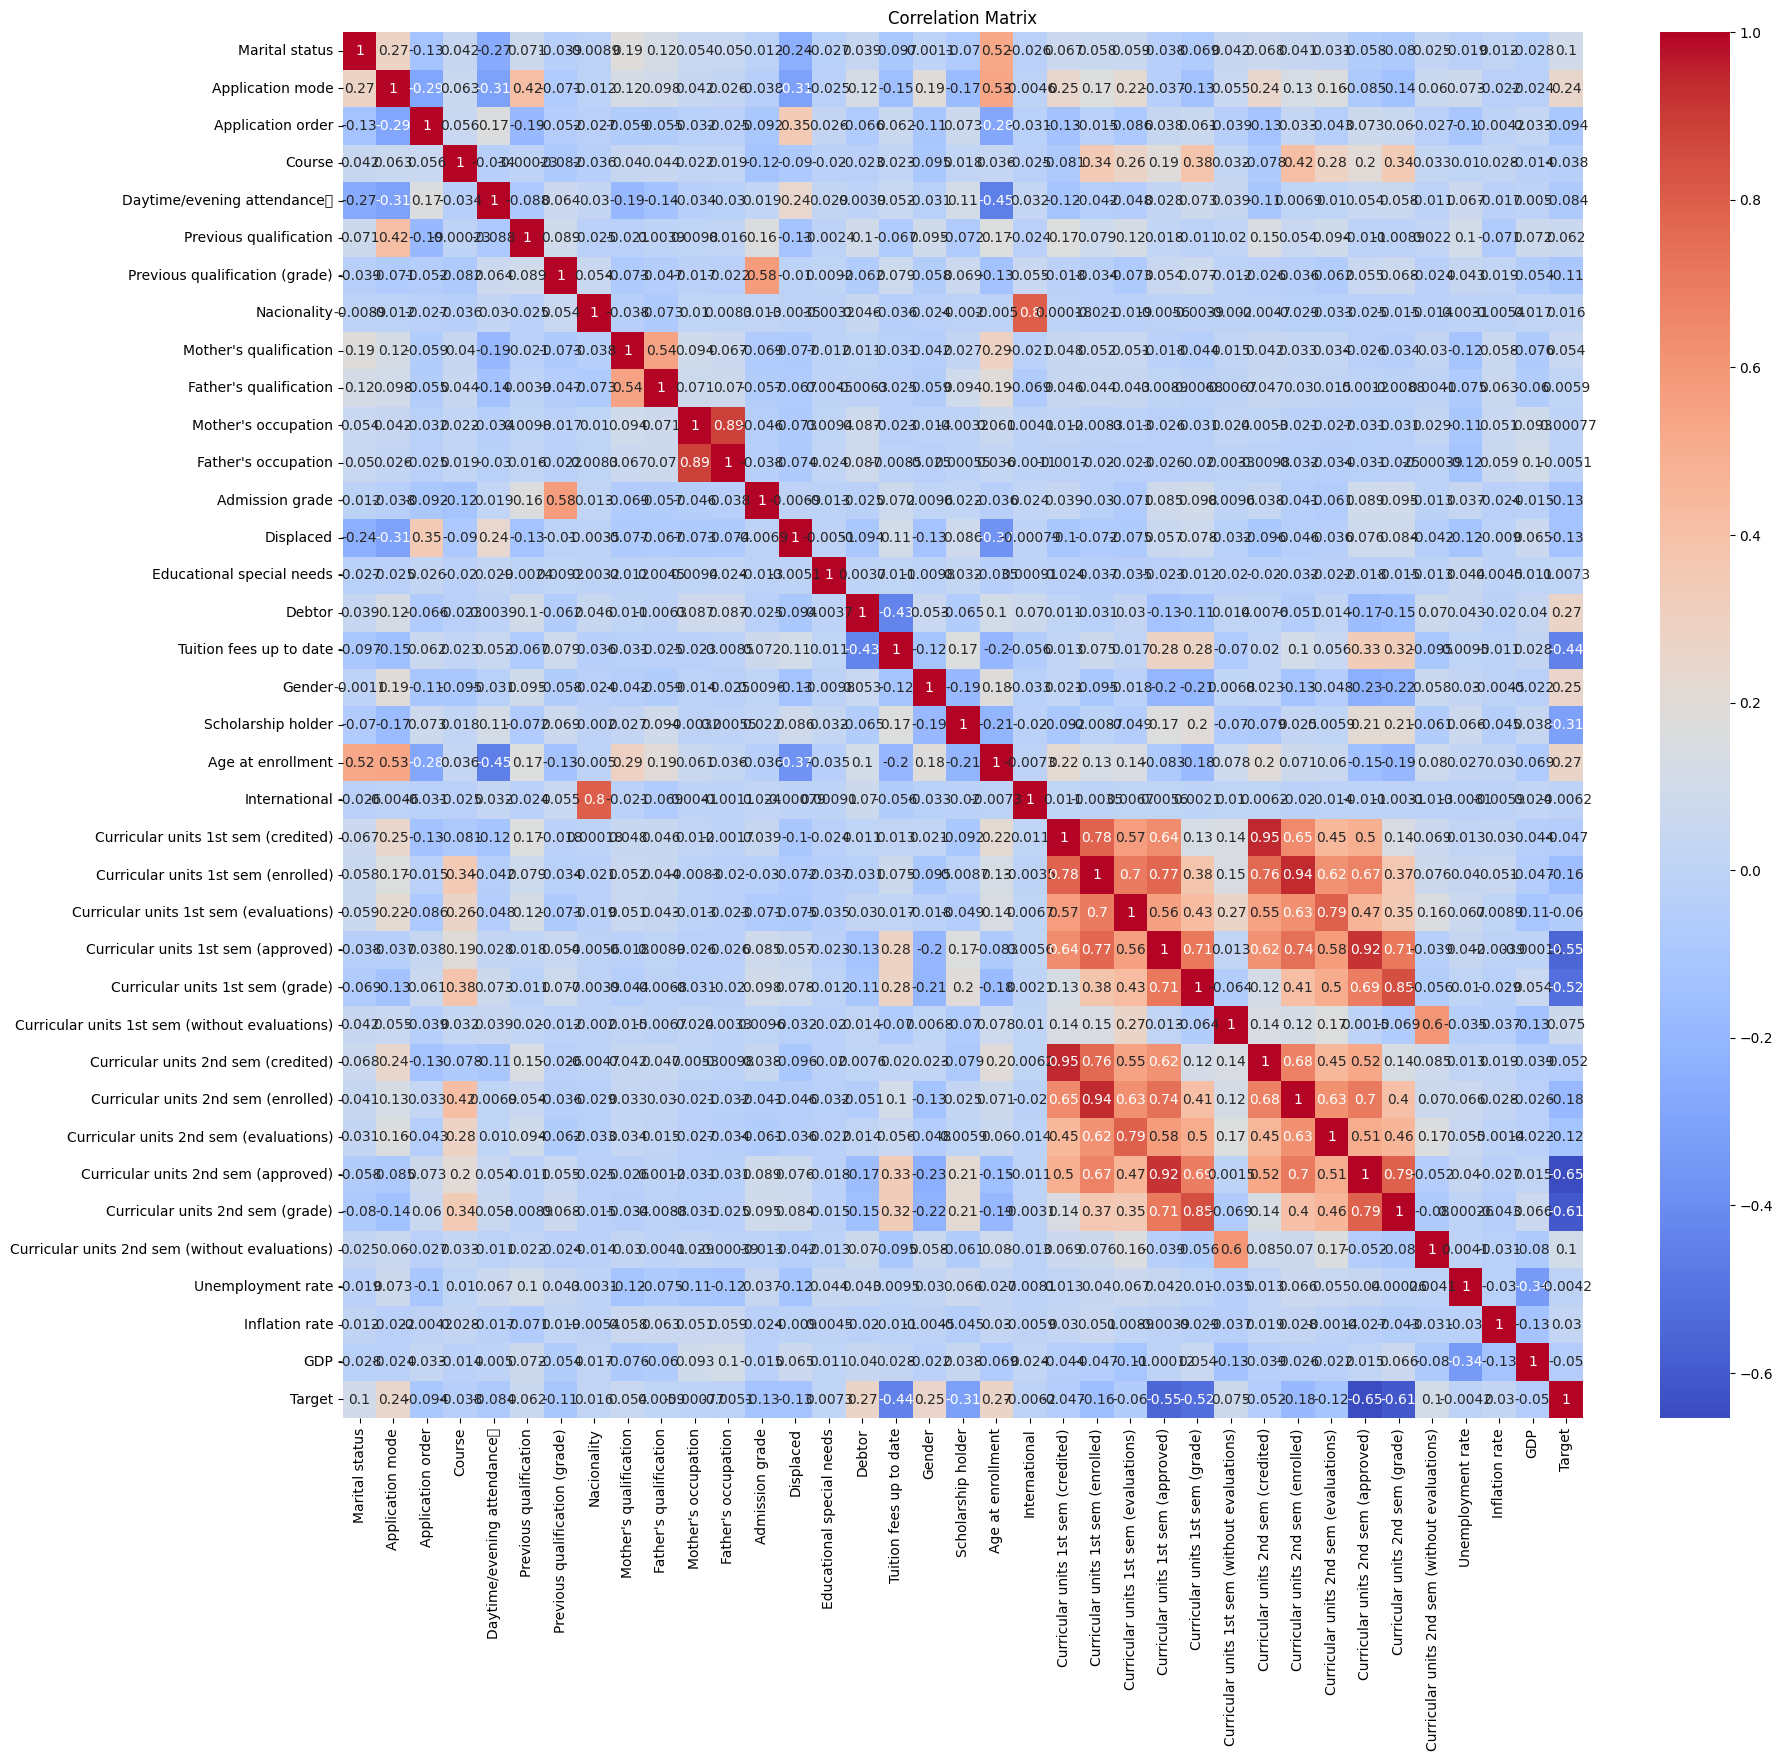

In [7]:
# Correlation matrix to see relevant columns to use
corr_matrix = new_dt.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Sorting feature by absolute correlation with "Target"
features = corr_matrix['Target'].abs().sort_values(ascending=False)
print(features)

Target                                            1.000000
Curricular units 2nd sem (approved)               0.653995
Curricular units 2nd sem (grade)                  0.605350
Curricular units 1st sem (approved)               0.554881
Curricular units 1st sem (grade)                  0.519927
Tuition fees up to date                           0.442138
Scholarship holder                                0.313018
Age at enrollment                                 0.267229
Debtor                                            0.267207
Gender                                            0.251955
Application mode                                  0.244507
Curricular units 2nd sem (enrolled)               0.182897
Curricular units 1st sem (enrolled)               0.161074
Admission grade                                   0.128058
Displaced                                         0.126113
Curricular units 2nd sem (evaluations)            0.119239
Previous qualification (grade)                    0.1094

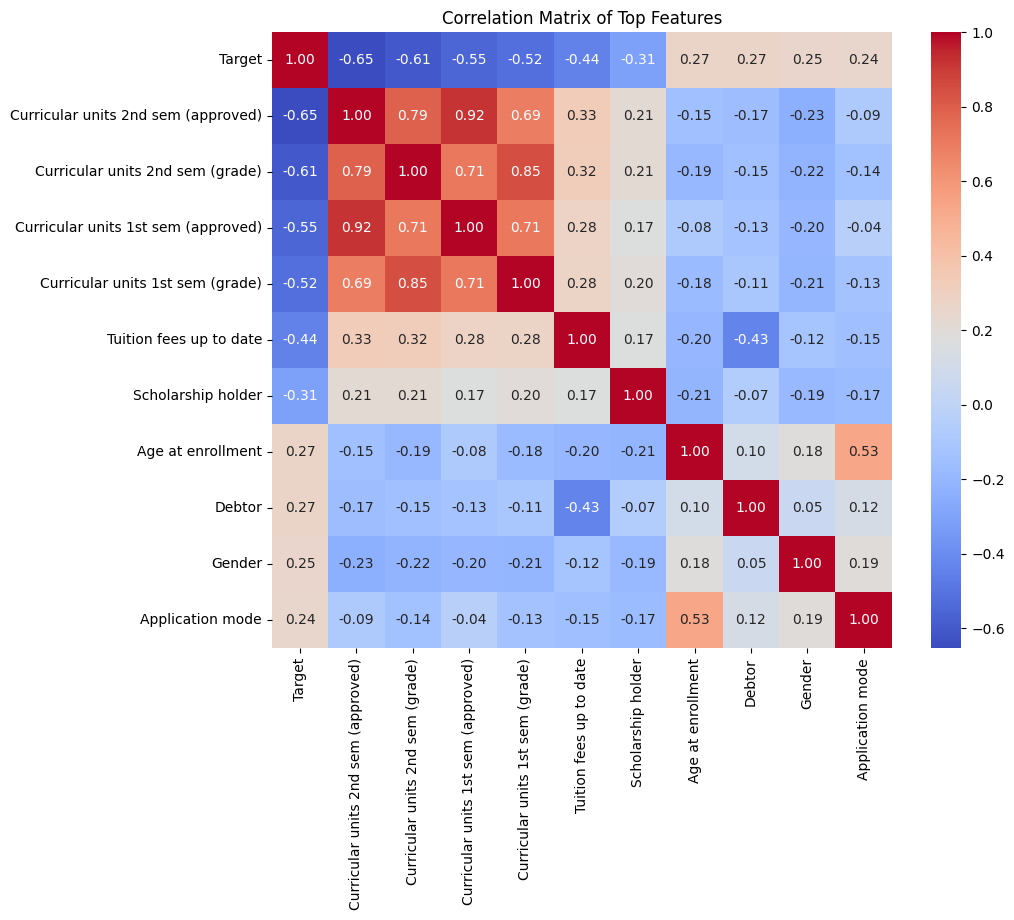

In [9]:
# Seeing the correlation heatmap with top features
top_features = features[features > 0.2].index
corr_matrix_top = new_dt[top_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_top, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top Features')
plt.show()

In [10]:
# Keeping the important features that are have good correlation with the Target
important_features = [
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Tuition fees up to date',
    'Scholarship holder',
    'Age at enrollment',
    'Debtor',
    'Gender',
    'Target'
]
filter_dt = new_dt[important_features].copy()
filter_dt.head()

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Tuition fees up to date,Scholarship holder,Age at enrollment,Debtor,Gender,Target
0,0,0.000000,1,0,20,0,1,1
1,6,13.666667,0,0,19,0,1,0
2,0,0.000000,0,0,19,0,1,1
3,5,12.400000,1,0,20,0,0,0
4,6,13.000000,1,0,45,0,0,0


In [11]:
# Check for null values
print(filter_dt.isnull().sum())

Curricular units 2nd sem (approved)    0
Curricular units 2nd sem (grade)       0
Tuition fees up to date                0
Scholarship holder                     0
Age at enrollment                      0
Debtor                                 0
Gender                                 0
Target                                 0
dtype: int64


In [12]:
# Check duplicates in the data
filter_dt.duplicated().sum()


909

In [13]:
# Remove duplicated
filter_dt.drop_duplicates(inplace=True)
filter_dt.duplicated().sum()

0

In [14]:
filter_dt["Target"].value_counts()

,count
Target,
0,1832
1,889


In [17]:
# Remove space in columns names to avoid value error
filter_dt.columns = filter_dt.columns.str.replace(' ', '_')
print(filter_dt.columns)

Index(['Curricular_units_2nd_sem_(approved)',
       'Curricular_units_2nd_sem_(grade)', 'Tuition_fees_up_to_date',
       'Scholarship_holder', 'Age_at_enrollment', 'Debtor', 'Gender',
       'Target'],
      dtype='object')


In [18]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_feature = ['Curricular_units_2nd_sem_(approved)', 'Curricular_units_2nd_sem_(grade)', 'Age_at_enrollment']

filter_dt[scaled_feature] = scaler.fit_transform(filter_dt[['Curricular_units_2nd_sem_(approved)', 'Curricular_units_2nd_sem_(grade)', 'Age_at_enrollment']])
filter_dt.head()

,Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Gender,Target
0,-1.856201,-2.979715,1,0,-0.469233,0,1,1
1,0.232169,0.491606,0,0,-0.589969,0,1,0
2,-1.856201,-2.979715,0,0,-0.589969,0,1,1
3,-0.115893,0.169874,1,0,-0.469233,0,0,0
4,0.232169,0.322274,1,0,2.549165,0,0,0


In [20]:
#Selectin feature and target
x = filter_dt[['Curricular_units_2nd_sem_(approved)', 'Curricular_units_2nd_sem_(grade)', 'Age_at_enrollment', 'Scholarship_holder', 'Tuition_fees_up_to_date', 'Debtor', 'Gender']]
y = filter_dt['Target']

In [21]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
<img src="/content/ModelDiagram.jpg" width='500'>

![Model Architecture](/content/ModelDiagram.jpg)



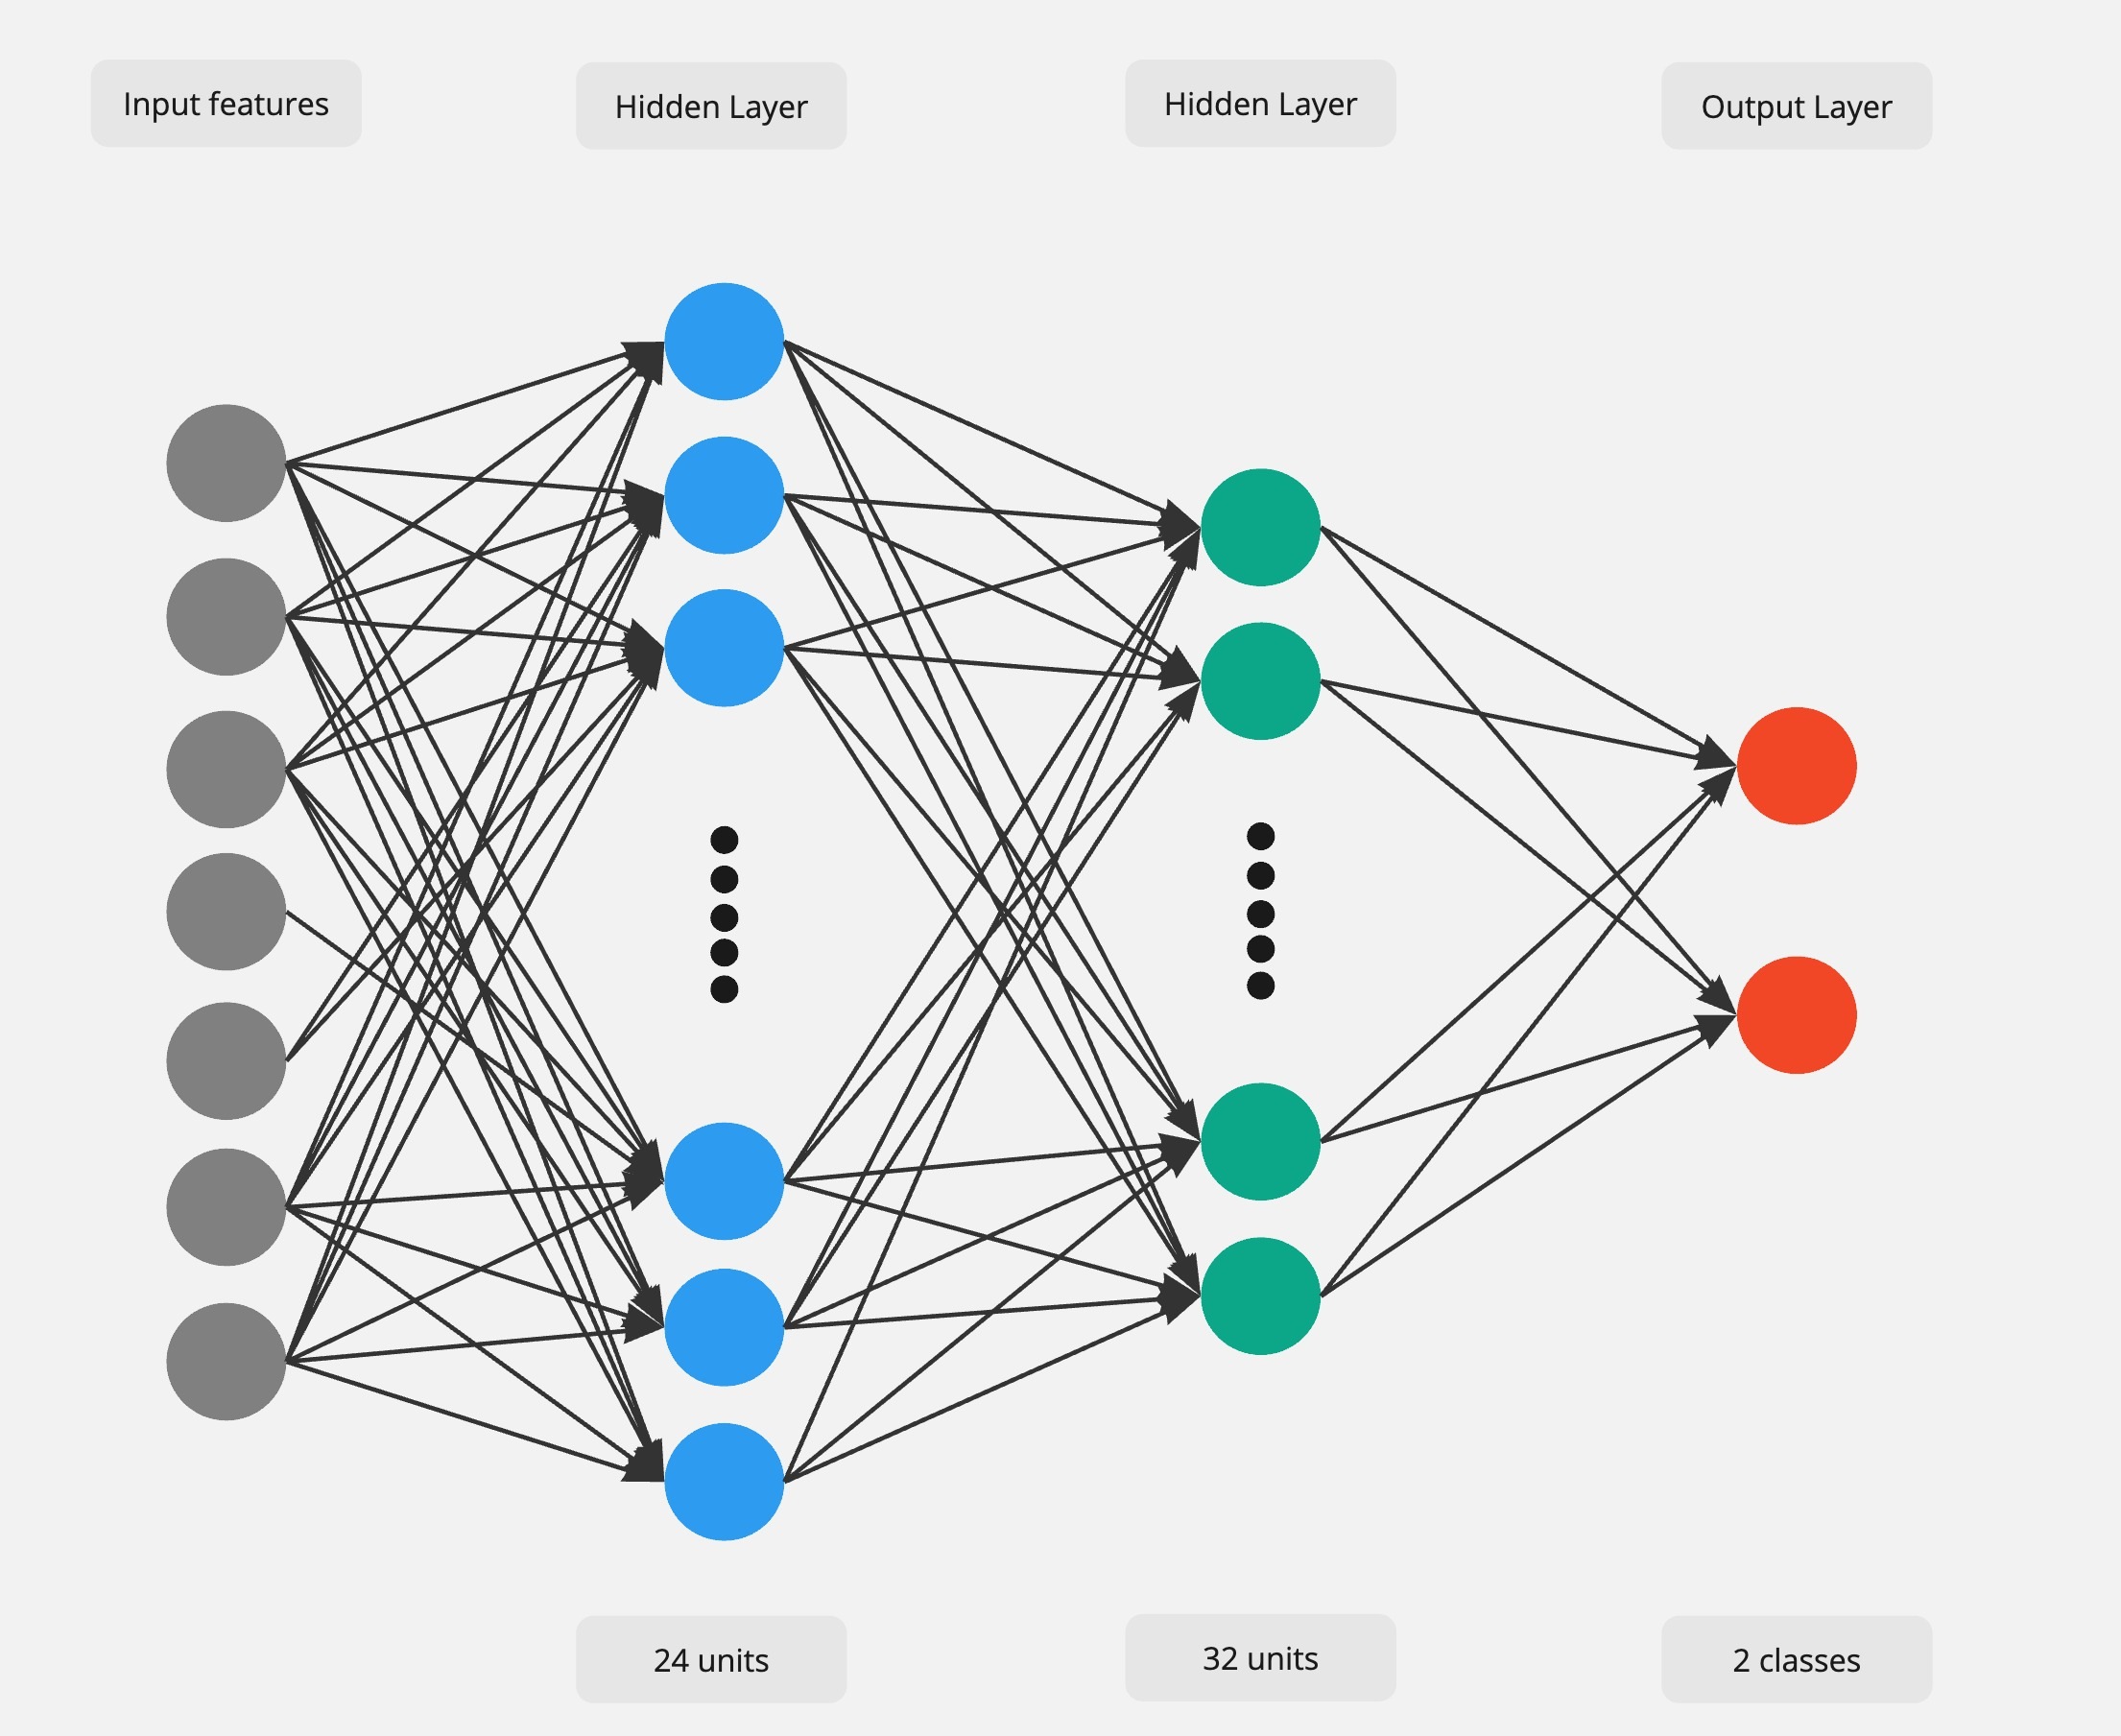

In [215]:
# The text cell the image wasn't showing that's why I used this alternative
from IPython.display import display, Image
display(Image(filename="/content/ModelDiagram.jpg"))

#Task: Define a function that creates models without and With specified Optimization techniques


In [196]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight



def define_model(x_train,
                 y_train,
                 optimization="adam",
                 regularization_datatype=None,
                 regularization_rate=0.00,
                 early_stopping=False,
                 dropout=0.0,
                 learning_rate=0.001,
                 batch_normalization=False,
                 validation_split=0.2,
                 epochs=500,
                 batch_size=32,
                 verbose=2,
                 patience=5,
                 use_smote=False,
                 use_class_weight=False
                 ):

  # Applying SMOTE if enabled
  if use_smote:
      smote = SMOTE(sampling_strategy='auto', random_state=42)
      x_train, y_train = smote.fit_resample(x_train, y_train)

  # Calculating class weights if enabled
  class_weights = None
  if use_class_weight:
      unique_classes = np.unique(y_train)
      class_weights_array = compute_class_weight('balanced', classes=unique_classes, y=y_train)
      class_weights = {i: class_weights_array[i] for i in range(len(unique_classes))}

  # Selecting regularization
  if regularization_datatype == 'l1':
    regularizer = regularizers.l1(regularization_rate)
  elif regularization_datatype == 'l2':
    regularizer = regularizers.l2(regularization_rate)
  else:
    regularizer = None

  model= Sequential()

  model.add(Dense(units=24, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=regularizer))
  if batch_normalization:
    model.add(BatchNormalization())
  model.add(Dropout(dropout))

  model.add(Dense(units=32, activation='relu', kernel_regularizer=regularizer))
  if batch_normalization:
    model.add(BatchNormalization())
  model.add(Dropout(dropout))
  #TO DO: Add more layers as per architecture
  model.add(Dense(units=1, activation='sigmoid')) # Last Layer

  # Choosing the Optimizers
  if optimization == 'adam':
    optimizer = Adam(learning_rate=learning_rate)
  elif optimization == 'rmsprop':
    optimizer = RMSprop(learning_rate=learning_rate)
  elif optimization == 'sgd':
    optimizer = SGD(learning_rate=learning_rate)
  else:
    optimizer = None

  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  patience = 5 if early_stopping and patience == 0 else patience
  callbacks = [EarlyStopping(monitor='val_loss', patience=patience)] if early_stopping else []
  history = model.fit(x_train, y_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size, callbacks=callbacks, verbose=verbose)

  return model, history

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [182]:
def loss_curve_plot(history):
  epochs = range(1, len(history.history['loss']) + 1)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(model, x_test, y_test):
    y_pred_probs = model.predict(x_test)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Computing metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

### **No Optimizer or regularization technique used**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 - 2s - 54ms/step - accuracy: 0.5912 - loss: 0.6693 - val_accuracy: 0.7385 - val_loss: 0.5739
Epoch 2/100
44/44 - 0s - 10ms/step - accuracy: 0.8060 - loss: 0.4968 - val_accuracy: 0.7960 - val_loss: 0.4874
Epoch 3/100
44/44 - 0s - 5ms/step - accuracy: 0.8477 - loss: 0.4085 - val_accuracy: 0.8103 - val_loss: 0.4527
Epoch 4/100
44/44 - 0s - 5ms/step - accuracy: 0.8779 - loss: 0.3620 - val_accuracy: 0.8276 - val_loss: 0.4419
Epoch 5/100
44/44 - 0s - 6ms/step - accuracy: 0.8836 - loss: 0.3411 - val_accuracy: 0.8305 - val_loss: 0.4393
Epoch 6/100
44/44 - 0s - 5ms/step - accuracy: 0.8851 - loss: 0.3302 - val_accuracy: 0.8247 - val_loss: 0.4327
Epoch 7/100
44/44 - 0s - 7ms/step - accuracy: 0.8879 - loss: 0.3230 - val_accuracy: 0.8218 - val_loss: 0.4331
Epoch 8/100
44/44 - 0s - 7ms/step - accuracy: 0.8836 - loss: 0.3183 - val_accuracy: 0.8247 - val_loss: 0.4297
Epoch 9/100
44/44 - 0s - 5ms/step - accuracy: 0.8843 - loss: 0.3167 - val_accuracy: 0.8161 - val_loss: 0.4325
Epoch 10/100
44/44 -

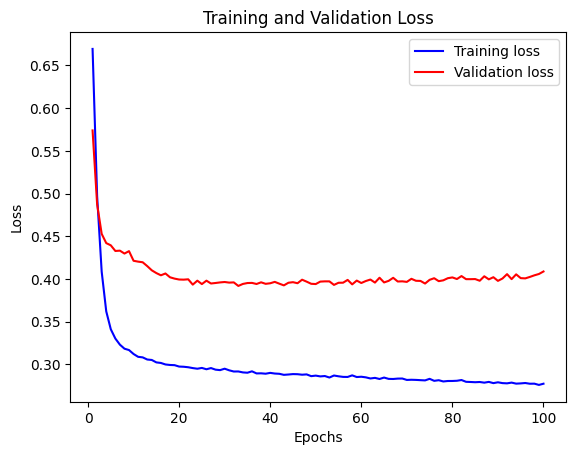

In [184]:
#TODO:
model_1, history_1 = define_model(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)
loss_curve_plot(history_1)
#print out confusion matrix and error analysis metrics after the cell

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       374
           1       0.87      0.73      0.79       171

    accuracy                           0.88       545
   macro avg       0.88      0.84      0.85       545
weighted avg       0.88      0.88      0.88       545



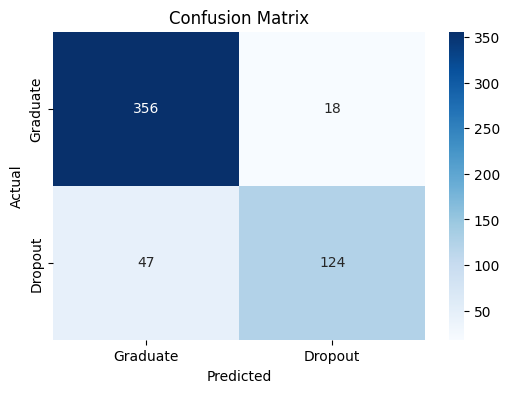

{'accuracy': 0.8807339449541285,
 'precision': 0.8732394366197183,
 'recall': 0.7251461988304093,
 'f1_score': 0.792332268370607}

In [185]:
evaluate_model(model_2, x_test, y_test)

### **Combition of Adam optimizer, dropout=0.2, earlystopping, batch_size=64, learning_rate=0.0001, Batch_normalization only**

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4577 - loss: 0.9974 - val_accuracy: 0.6121 - val_loss: 0.6841
Epoch 2/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4996 - loss: 0.9933 - val_accuracy: 0.6322 - val_loss: 0.6741
Epoch 3/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5022 - loss: 0.8987 - val_accuracy: 0.6322 - val_loss: 0.6634
Epoch 4/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5236 - loss: 0.8414 - val_accuracy: 0.6293 - val_loss: 0.6522
Epoch 5/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5348 - loss: 0.8230 - val_accuracy: 0.6322 - val_loss: 0.6404
Epoch 6/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6112 - loss: 0.7288 - val_accuracy: 0.6523 - val_loss: 0.6280
Epoch 7/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5889 - loss: 0.7909 - val_accuracy: 0.6753 - val_loss: 0.6144
Epoch 8/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6521 - loss: 0.6759 - val_accuracy: 0.6839 - val_loss: 0

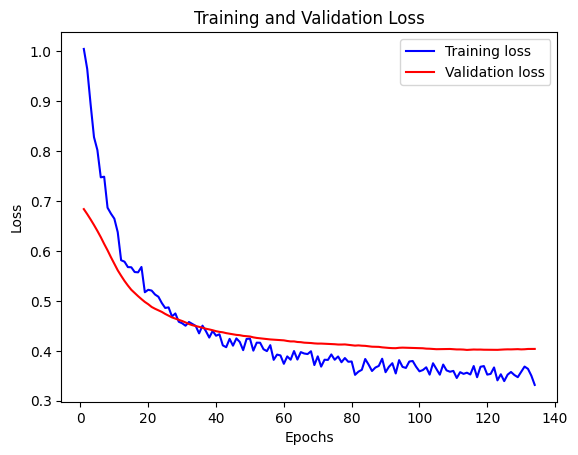

In [186]:
#TODO:
model_2, history_2 = define_model(x_train, y_train, optimization='adam', early_stopping=True, dropout=0.2, batch_size=64, epochs=300,learning_rate=0.0001, batch_normalization=True, verbose=1, patience=20)
loss_curve_plot(history_2)
#print out confusion matrix and error analysis metrics after the cell

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       374
           1       0.88      0.73      0.80       171

    accuracy                           0.88       545
   macro avg       0.88      0.84      0.86       545
weighted avg       0.88      0.88      0.88       545



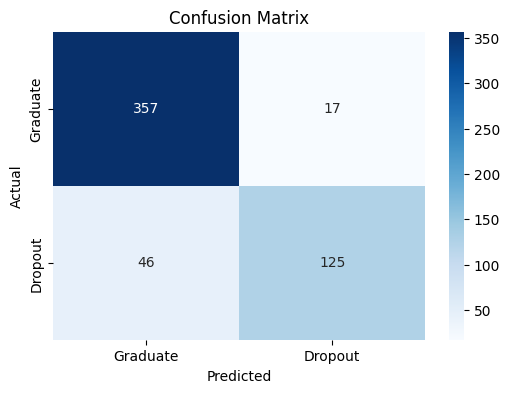

{'accuracy': 0.8844036697247707,
 'precision': 0.8802816901408451,
 'recall': 0.7309941520467836,
 'f1_score': 0.7987220447284346}

In [187]:
evaluate_model(model_2, x_test, y_test)

### **Combination of Adam optimizer, regularization 'l2', dropout=0.2, batch_size=64, learning_rate=0.0001, regularization_rate=0.001, and batch_normalization**

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4083 - loss: 1.1845 - val_accuracy: 0.3017 - val_loss: 0.7936
Epoch 2/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4441 - loss: 1.0673 - val_accuracy: 0.3132 - val_loss: 0.7844
Epoch 3/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4457 - loss: 1.0766 - val_accuracy: 0.3966 - val_loss: 0.7716
Epoch 4/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4689 - loss: 1.0035 - val_accuracy: 0.5115 - val_loss: 0.7569
Epoch 5/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5180 - loss: 0.9114 - val_accuracy: 0.5431 - val_loss: 0.7416
Epoch 6/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5308 - loss: 0.8902 - val_accuracy: 0.5862 - val_loss: 0.7257
Epoch 7/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5365 - loss: 0.8694 - val_accuracy: 0.6523 - val_loss: 0.7092
Epoch 8/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5990 - loss: 0.7958 - val_accuracy: 0.6954 - val_loss:

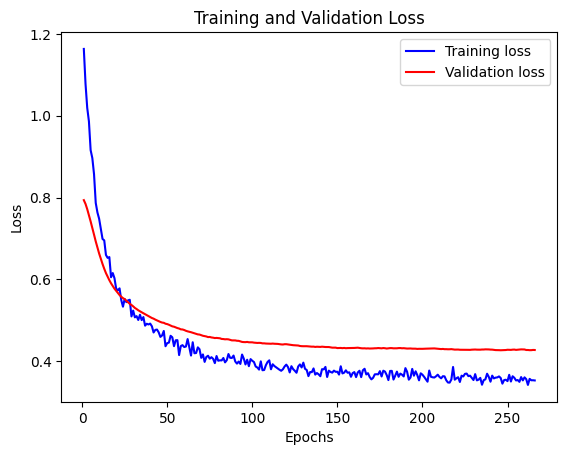

In [189]:
#TODO:
model_3, history_3 = define_model(x_train, y_train, optimization='adam', early_stopping=True, dropout=0.2, batch_size=64, epochs=300,learning_rate=0.0001, regularization_datatype='l2', regularization_rate=0.001, batch_normalization=True, verbose=1, patience=20)
loss_curve_plot(history_3)
#print out confusion matrix and error analysis metrics after the cell

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       374
           1       0.87      0.73      0.79       171

    accuracy                           0.88       545
   macro avg       0.88      0.84      0.85       545
weighted avg       0.88      0.88      0.88       545



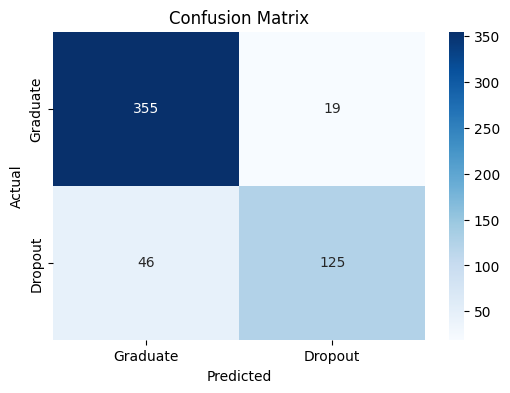

{'accuracy': 0.8807339449541285,
 'precision': 0.8680555555555556,
 'recall': 0.7309941520467836,
 'f1_score': 0.7936507936507936}

In [190]:
evaluate_model(model_3, x_test, y_test)

### **Combination of RMSprop, dropout=0.4, regularization 'l2' on the rate of 0.001 and batch_normalization**

Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4562 - loss: 1.2108 - val_accuracy: 0.2989 - val_loss: 0.8321
Epoch 2/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5155 - loss: 1.0857 - val_accuracy: 0.3132 - val_loss: 0.8294
Epoch 3/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5133 - loss: 1.0892 - val_accuracy: 0.3247 - val_loss: 0.8223
Epoch 4/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5080 - loss: 1.0050 - val_accuracy: 0.3506 - val_loss: 0.8079
Epoch 5/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5345 - loss: 0.9767 - val_accuracy: 0.3678 - val_loss: 0.7862
Epoch 6/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5742 - loss: 0.9177 - val_accuracy: 0.4282 - val_loss: 0.7598
Epoch 7/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5672 - loss: 0.9093 - val_accuracy: 0.5230 - val_loss: 0.7318
Epoch 8/500
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5686 - loss: 0.8934 - val_accuracy: 0.5632 - val_lo

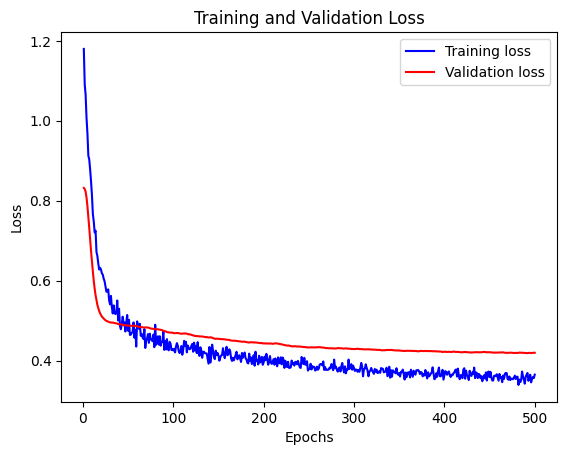

In [154]:
#TODO:
model_4, history_4 = define_model(x_train, y_train, optimization='rmsprop', early_stopping=True, dropout=0.4, batch_size=64, epochs=500,learning_rate=0.0001, regularization_datatype='l2', regularization_rate=0.001, batch_normalization=True, verbose=1, patience=30)
loss_curve_plot(history_4)
#print out confusion matrix and error analysis metrics after the cell

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       374
           1       0.86      0.71      0.78       171

    accuracy                           0.87       545
   macro avg       0.87      0.83      0.84       545
weighted avg       0.87      0.87      0.87       545



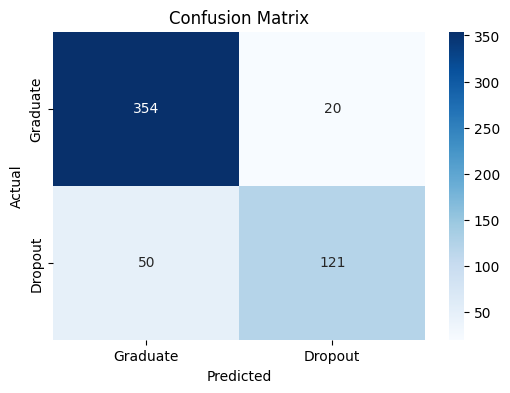

{'accuracy': 0.8715596330275229,
 'precision': 0.8581560283687943,
 'recall': 0.7076023391812866,
 'f1_score': 0.7756410256410257}

In [153]:
evaluate_model(model_4, x_test, y_test)

In [205]:
# Implementing ML Algorithm
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model and its hyperparameters
xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Best Hyperparameters: {best_params}")

Accuracy: 0.8862385321100917
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}



Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       374
           1       0.88      0.74      0.80       171

    accuracy                           0.89       545
   macro avg       0.88      0.85      0.86       545
weighted avg       0.89      0.89      0.88       545



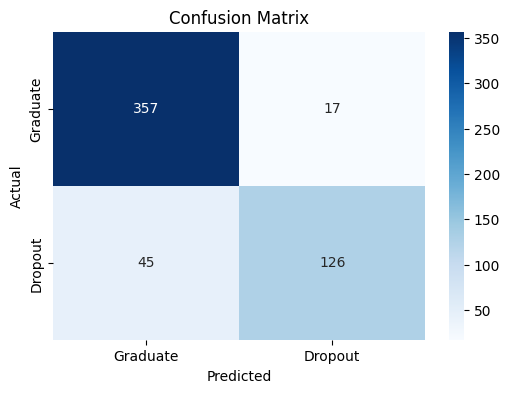

{'accuracy': 0.8862385321100917,
 'precision': 0.8811188811188811,
 'recall': 0.7368421052631579,
 'f1_score': 0.802547770700637}

In [201]:
evaluate_model(xgb_model, x_test, y_test)

In [206]:
# Save all those models
import pickle

models = {
    'model_1': model_1,
    'model_2': model_2,
    'model_3': model_3,
    'model_4': model_4,
    'model_5': xgb_model
}

def save_models(models, save_dir='saved_models'):
    import os
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for model_name, model in models.items():
        model_path = os.path.join(save_dir, f"{model_name}.pkl")
        with open(model_path, 'wb') as file:
            pickle.dump(model, file)
        print(f"Saved {model_name} to {model_path}")


In [207]:
save_models(models)

Saved model_1 to saved_models/model_1.pkl
Saved model_2 to saved_models/model_2.pkl
Saved model_3 to saved_models/model_3.pkl
Saved model_4 to saved_models/model_4.pkl
Saved model_5 to saved_models/model_5.pkl


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [209]:
def make_predictions(model_path, x_test):

    # Load the model
    with open(model_path, 'rb') as file:
      model = pickle.load(file)
    # Make predictions
    predictions = model.predict(x_test)
    # Convert probabilities to binary labels (0 or 1)

    return predictions

#Modify the code appropriately

In [210]:
model_path = 'saved_models/model_5.pkl'
prediction = make_predictions(model_path, x_test)
print(prediction)

[0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 1 0 0 0 0 0 

Congratulations!!
